In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
def get_rms(data, n):
    new = np.zeros(data.shape)
    for channel in range(data.shape[1]):
        for current in range(data.shape[0]):
            suma = 0
            for window in range(current, current - n, -1):
                suma += data[window, channel] * data[window, channel]
            new[current, channel] = (np.sqrt((1/n)*suma) / 128) if channel != 8 else data[current, channel]
    #plt.figure()
    #plt.plot(data)
    #plt.figure()
    #plt.plot(new)
    return new

def peel_labels(data):
    return data[:,:8], data[:,8]

def get_values(seshes, skip_hibernation):
    big_matrix = np.zeros((0, 9))
    for sesh in seshes:
        print(sesh[0])
        for gesture in range(8):
            matrix = np.genfromtxt(sesh[0] + "/" + str(gesture) + ".txt", delimiter=",")
            rms = get_rms(matrix, 80)
            #plt.figure()
            #plt.plot(rms)
            if skip_hibernation:
                rms = rms[rms[:,8] != 0]
                rms[:,8] -= 1
            #plt.figure()
            #plt.plot(rms)
            big_matrix = np.concatenate((big_matrix, rms), axis = 0)
    return big_matrix

In [3]:
#gotta go fast
skip_hibernation = True
readings = "../myo-readings-dataset/_readings/"
seshes = list(os.walk(readings))[1:]
print(seshes[7])
print(seshes[8])
print(seshes[9])
#np.random.shuffle(seshes)
train_set, valid_set, test_set = get_values([seshes[1]], skip_hibernation), \
                                 get_values([seshes[2]], skip_hibernation), \
                                 get_values([seshes[3]], skip_hibernation)

train, train_labels = peel_labels(train_set)
valid, valid_labels = peel_labels(valid_set)
test, test_labels = peel_labels(test_set)

('../myo-readings-dataset/_readings/Meritve-seja-1', [], ['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt'])
('../myo-readings-dataset/_readings/Meritve-seja-2', [], ['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt'])
('../myo-readings-dataset/_readings/Meritve-seja-3', [], ['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt'])
../myo-readings-dataset/_readings/AM-S1
../myo-readings-dataset/_readings/AM-S2
../myo-readings-dataset/_readings/AM-S3


In [ ]:
#all sessions
skip_hibernation = False
readings = "../myo-readings-dataset/_readings/"
seshes = list(os.walk(readings))[1:]
np.random.shuffle(seshes)
siz = len(seshes)
split1 = int(0.6 * siz)
split2 = int(0.8 * siz)
train_set, valid_set, test_set = get_values(seshes[:split1], skip_hibernation), \
                                 get_values(seshes[split1:split2], skip_hibernation), \
                                 get_values(seshes[split2:], skip_hibernation)

train, train_labels = peel_labels(train_set)
valid, valid_labels = peel_labels(valid_set)
test, test_labels = peel_labels(test_set)

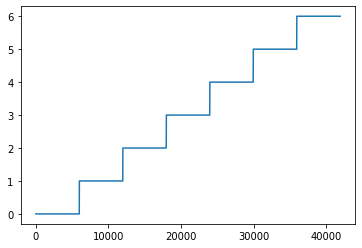

In [4]:
plt.figure()
plt.plot(test_labels)

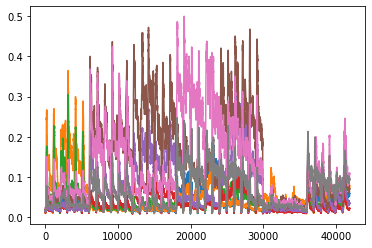

In [8]:
plt.plot(train)

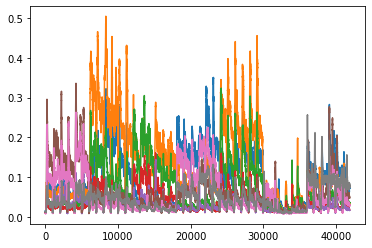

In [9]:
plt.plot(valid)

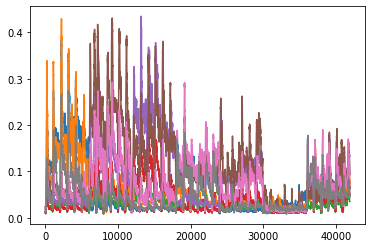

In [10]:
plt.plot(test)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(200, activation = "relu", input_shape = (8,)),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(70, activation = "relu"),
    keras.layers.Dense(7 if skip_hibernation else 8, activation = "sigmoid")
])

opt = keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer = opt, loss = loss, metrics = ["accuracy"])

In [12]:
history = model.fit(train, train_labels, validation_data = (valid, valid_labels), epochs=15)

Epoch 1/15
1310/1310 [==============================] - 3s 2ms/step - loss: 0.4538 - accuracy: 0.8302 - val_loss: 19.2992 - val_accuracy: 0.3465
Epoch 2/15
1310/1310 [==============================] - 2s 2ms/step - loss: 0.1835 - accuracy: 0.9316 - val_loss: 23.8487 - val_accuracy: 0.2948
Epoch 3/15
1273/1310 [============================>.] - ETA: 0s - loss: 0.1428 - accuracy: 0.9469 ETA: 0s - loss: 0.1439 - accuracy

KeyboardInterrupt: 

In [13]:
model.evaluate(test, test_labels)

1310/1310 [==============================] - 1s 740us/step - loss: 8.8585 - accuracy: 0.5101


[8.858546257019043, 0.5101446509361267]

In [14]:
predictions = model.predict(test)

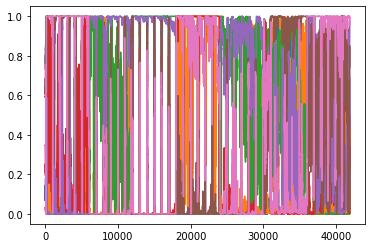

In [15]:
plt.plot(predictions)

In [16]:
predictions.shape

(41894, 7)

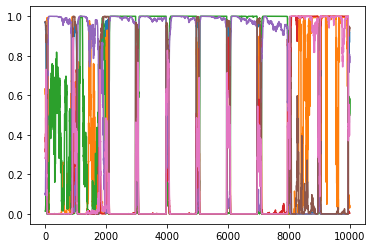

In [17]:
plt.plot(predictions[10000:20000])

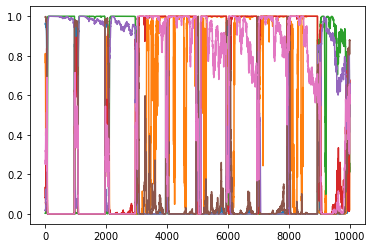

In [18]:
plt.plot(predictions[15000:25000])

In [19]:
training_analysis = model.predict(train)

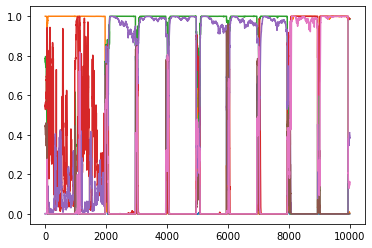

In [20]:
plt.plot(training_analysis[10000:20000])

In [22]:
confusion_matrix(test_labels, predictions)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
predictions